Notebook to play with some graph forms...

In [2]:
### Standard Magic and startup initializers.

import math
import csv
import numpy as np
import random
import itertools
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
matplotlib.style.use('seaborn-whitegrid')

font = {'family'  :'serif',
        'size'   : 22}

matplotlib.rc('font', **font)

### Load Datafiles..
## Load some stuff from Pickle..
import pickle

## Open an older file
with open("./1000_stepping_run.pickle", 'rb') as input_file:
     results = pickle.load(input_file)

## Open an older file
with open("./1000_stepping_run_uniform.pickle", 'rb') as input_file:
     uniform_results = pickle.load(input_file)

# Print the keys.
print("players, tasks, sample")
for k,v in results.items():
    print(k)

players, tasks, sample
(5, 30)
(10, 5)
(2, 70)
(5, 10)
(5, 5)
(2, 50)
(5, 70)
(10, 70)
(5, 50)
(2, 10)
(10, 30)
(2, 30)
(2, 5)
(10, 50)
(10, 10)


            2           5           10
5     0.006819    0.016678    0.033212
10    0.063348    0.178242    0.377655
30    2.620236    9.073796   23.524422
50   25.765830   89.238418  222.992741
70  107.386757  379.349311  787.160301
            2           5            10
5     0.005216    0.010583     0.020155
10    0.034577    0.135762     0.244456
30    2.349703   10.141068    28.983025
50   35.372481  118.425861   311.230165
70  146.042514  769.699986  1004.326137
          2          5           10
5   0.004272   0.010473    0.020113
10  0.029629   0.078207    0.162628
30  0.634193   2.217992    6.046969
50  3.111379  13.037105   46.203912
70  9.442468  40.573399  158.673905
          2         5          10
5   0.001078  0.001731   0.003553
10  0.004977  0.011571   0.028786
30  0.093679  0.330223   0.887312
50  0.444567  1.804271  17.048166
70  1.382044  5.754932  62.828016


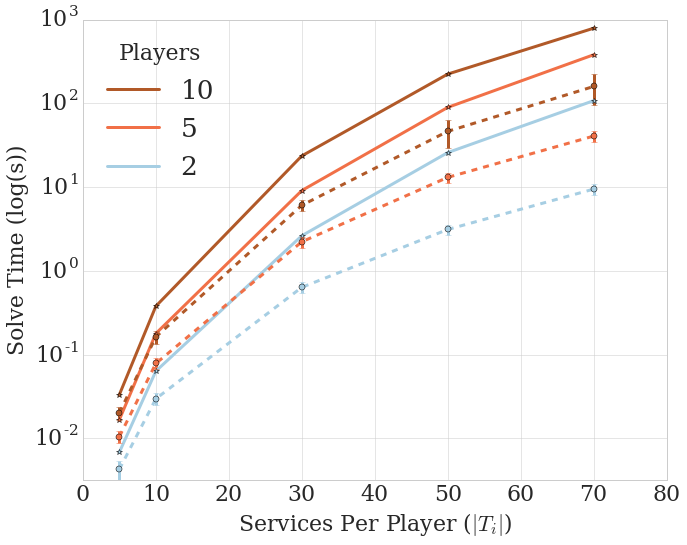

In [4]:
df = pd.DataFrame(results)
m = df.mean().unstack().T
e = df.std().unstack().T
print(m)
print(e)
#print(df.max())

uf = pd.DataFrame(uniform_results)
mu = uf.mean().unstack().T
eu = uf.std().unstack().T
print(mu)
print(eu)

color_list = plt.cm.Paired(np.linspace(0, 1, 3))
color_list = color_list[:6]
#a = m.plot(kind='line', yerr=e.values.T, marker='*',figsize=(10,8),linewidth=3, color=color_list)
a = m.plot(kind='line', marker='*',figsize=(10,8),linewidth=3, color=color_list)

handles, labels = a.get_legend_handles_labels()
plt.legend(loc="upper left", bbox_to_anchor=[0, 1], shadow=True, title="Players", fancybox=True, handles=handles[::-1], labels=labels[::-1])
#a.legend(handles[::-1], labels[::-1])

mu.plot(kind='line', yerr=eu.values.T, marker='o', ax = a, color=color_list, linestyle='--',linewidth=3, legend=False)
#mu.plot(kind='line', marker='o', ax = a, color=color_list, linestyle='--',linewidth=3, legend=False)

a.set_yscale("log", nonposy='clip')
a.set_xlim([0,80])
a.set_ylim([0,1000])
#plt.legend(bbox_to_anchor = (0,0.04,1,1), bbox_transform=plt.gcf().transFigure, loc='upper center', ncol=6, borderaxespad=0.)
a.set_xlabel("Services Per Player ($|T_i|$)")
a.set_ylabel("Solve Time (log(s))")
plt.tight_layout()
plt.savefig("test.pdf",bbox_inches='tight')
plt.show()
